## ASSIGNMENT : ADVANCED REGRESSION

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### STEP 1: DATA UNDERSTANDING AND EXPLORATION

In [602]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [603]:
# reading the dataset
df=pd.read_csv(r"C:\Vydehi School\upgrad\COURSE 3 (MACHINE LEARNING II)\ASSIGNMENT-ADVANCED REGRESSION\train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [604]:
#inspecting the number of rows and columns
df.shape

(1460, 81)

In [605]:
#inspecting datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [606]:
# Get a summary of the dataframe using 'describe()'
df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

#### MISSING VALUE TREATMENT

In [607]:
def missing_values(data):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).head(20)

In [608]:
#function to find missing values
missing_values(df)

Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageCond       81   5.547945
GarageType       81   5.547945
GarageYrBlt      81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
BsmtExposure     38   2.602740
BsmtFinType2     38   2.602740
BsmtFinType1     37   2.534247
BsmtCond         37   2.534247
BsmtQual         37   2.534247
MasVnrArea        8   0.547945
MasVnrType        8   0.547945
Electrical        1   0.068493
Utilities         0   0.000000

In [609]:
# Dropping the columns having more than 15% NA values 

df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>15)].columns, 1)

In [610]:
# Check the number of null values again
missing_values(df)

Total   Percent
GarageType       81  5.547945
GarageYrBlt      81  5.547945
GarageFinish     81  5.547945
GarageCond       81  5.547945
GarageQual       81  5.547945
BsmtExposure     38  2.602740
BsmtFinType2     38  2.602740
BsmtFinType1     37  2.534247
BsmtCond         37  2.534247
BsmtQual         37  2.534247
MasVnrType        8  0.547945
MasVnrArea        8  0.547945
Electrical        1  0.068493
RoofMatl          0  0.000000
RoofStyle         0  0.000000
SalePrice         0  0.000000
Exterior1st       0  0.000000
Exterior2nd       0  0.000000
YearBuilt         0  0.000000
ExterQual         0  0.000000

In [611]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
                 ... 
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
GarageType          6
GarageYrBlt        97
GarageFinish        3
GarageCars          5
GarageArea

### IMPUTING MISSING VALUE

In [612]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

df['GarageType'] = df['GarageType'].replace(np.nan, 'NA')
df['GarageFinish'] = df['GarageFinish'].replace(np.nan, 'NA')
df['GarageQual'] = df['GarageQual'].replace(np.nan, 'NA')
df['GarageCond'] = df['GarageCond'].replace(np.nan, 'NA')
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, 'NA')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 'NA')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 'NA')
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, 'NA')
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'NA')
df['MasVnrType'] = df['MasVnrType'].replace(np.nan, 'NA')
# Filling missing values in GarageYrBlt with median 
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
#filling missing values in MasVnrArea with median
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)


In [613]:
#converting year to number of years
df['YearBuilt'] = 2019 - df['YearBuilt']
df['YearRemodAdd'] = 2019 - df['YearRemodAdd']
df['GarageYrBlt'] = 2019 - df['GarageYrBlt']
df['YrSold'] = 2019 - df['YrSold']

In [614]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
                ... 
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond   

## STEP 2: DATA VISUALIZATION

In [615]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [616]:
category=[]
numeric=[]
for i in df.columns:
    if df[i].dtypes == "object" :
        category.append(i)
    else:
        numeric.append(i)
print(category)
print("-----------------------------------------")
print(numeric)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
-----------------------------------------
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'S

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.

We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot.


In [617]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5         16            16   
1   2          20     9600            6            8         43            43   
2   3          60    11250            7            5         18            17   
3   4          70     9550            7            5        104            49   
4   5          60    14260            8            5         19            19   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  OpenPorchSF  \
0       196.0         706           0  ...           0           61   
1         0.0         978           0  ...         298            0   
2       162.0         486           0  ...           0           42   
3         0.0         216           0  ...           0           35   
4       350.0         655           0  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2      11   
1              0          0            0         0        0       5      12   
2              0          0            0         0        0       9      11   
3            272          0            0         0        0       2      13   
4              0          0            0         0        0      12      11   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 37 columns]

<Figure size 2880x1440 with 0 Axes>

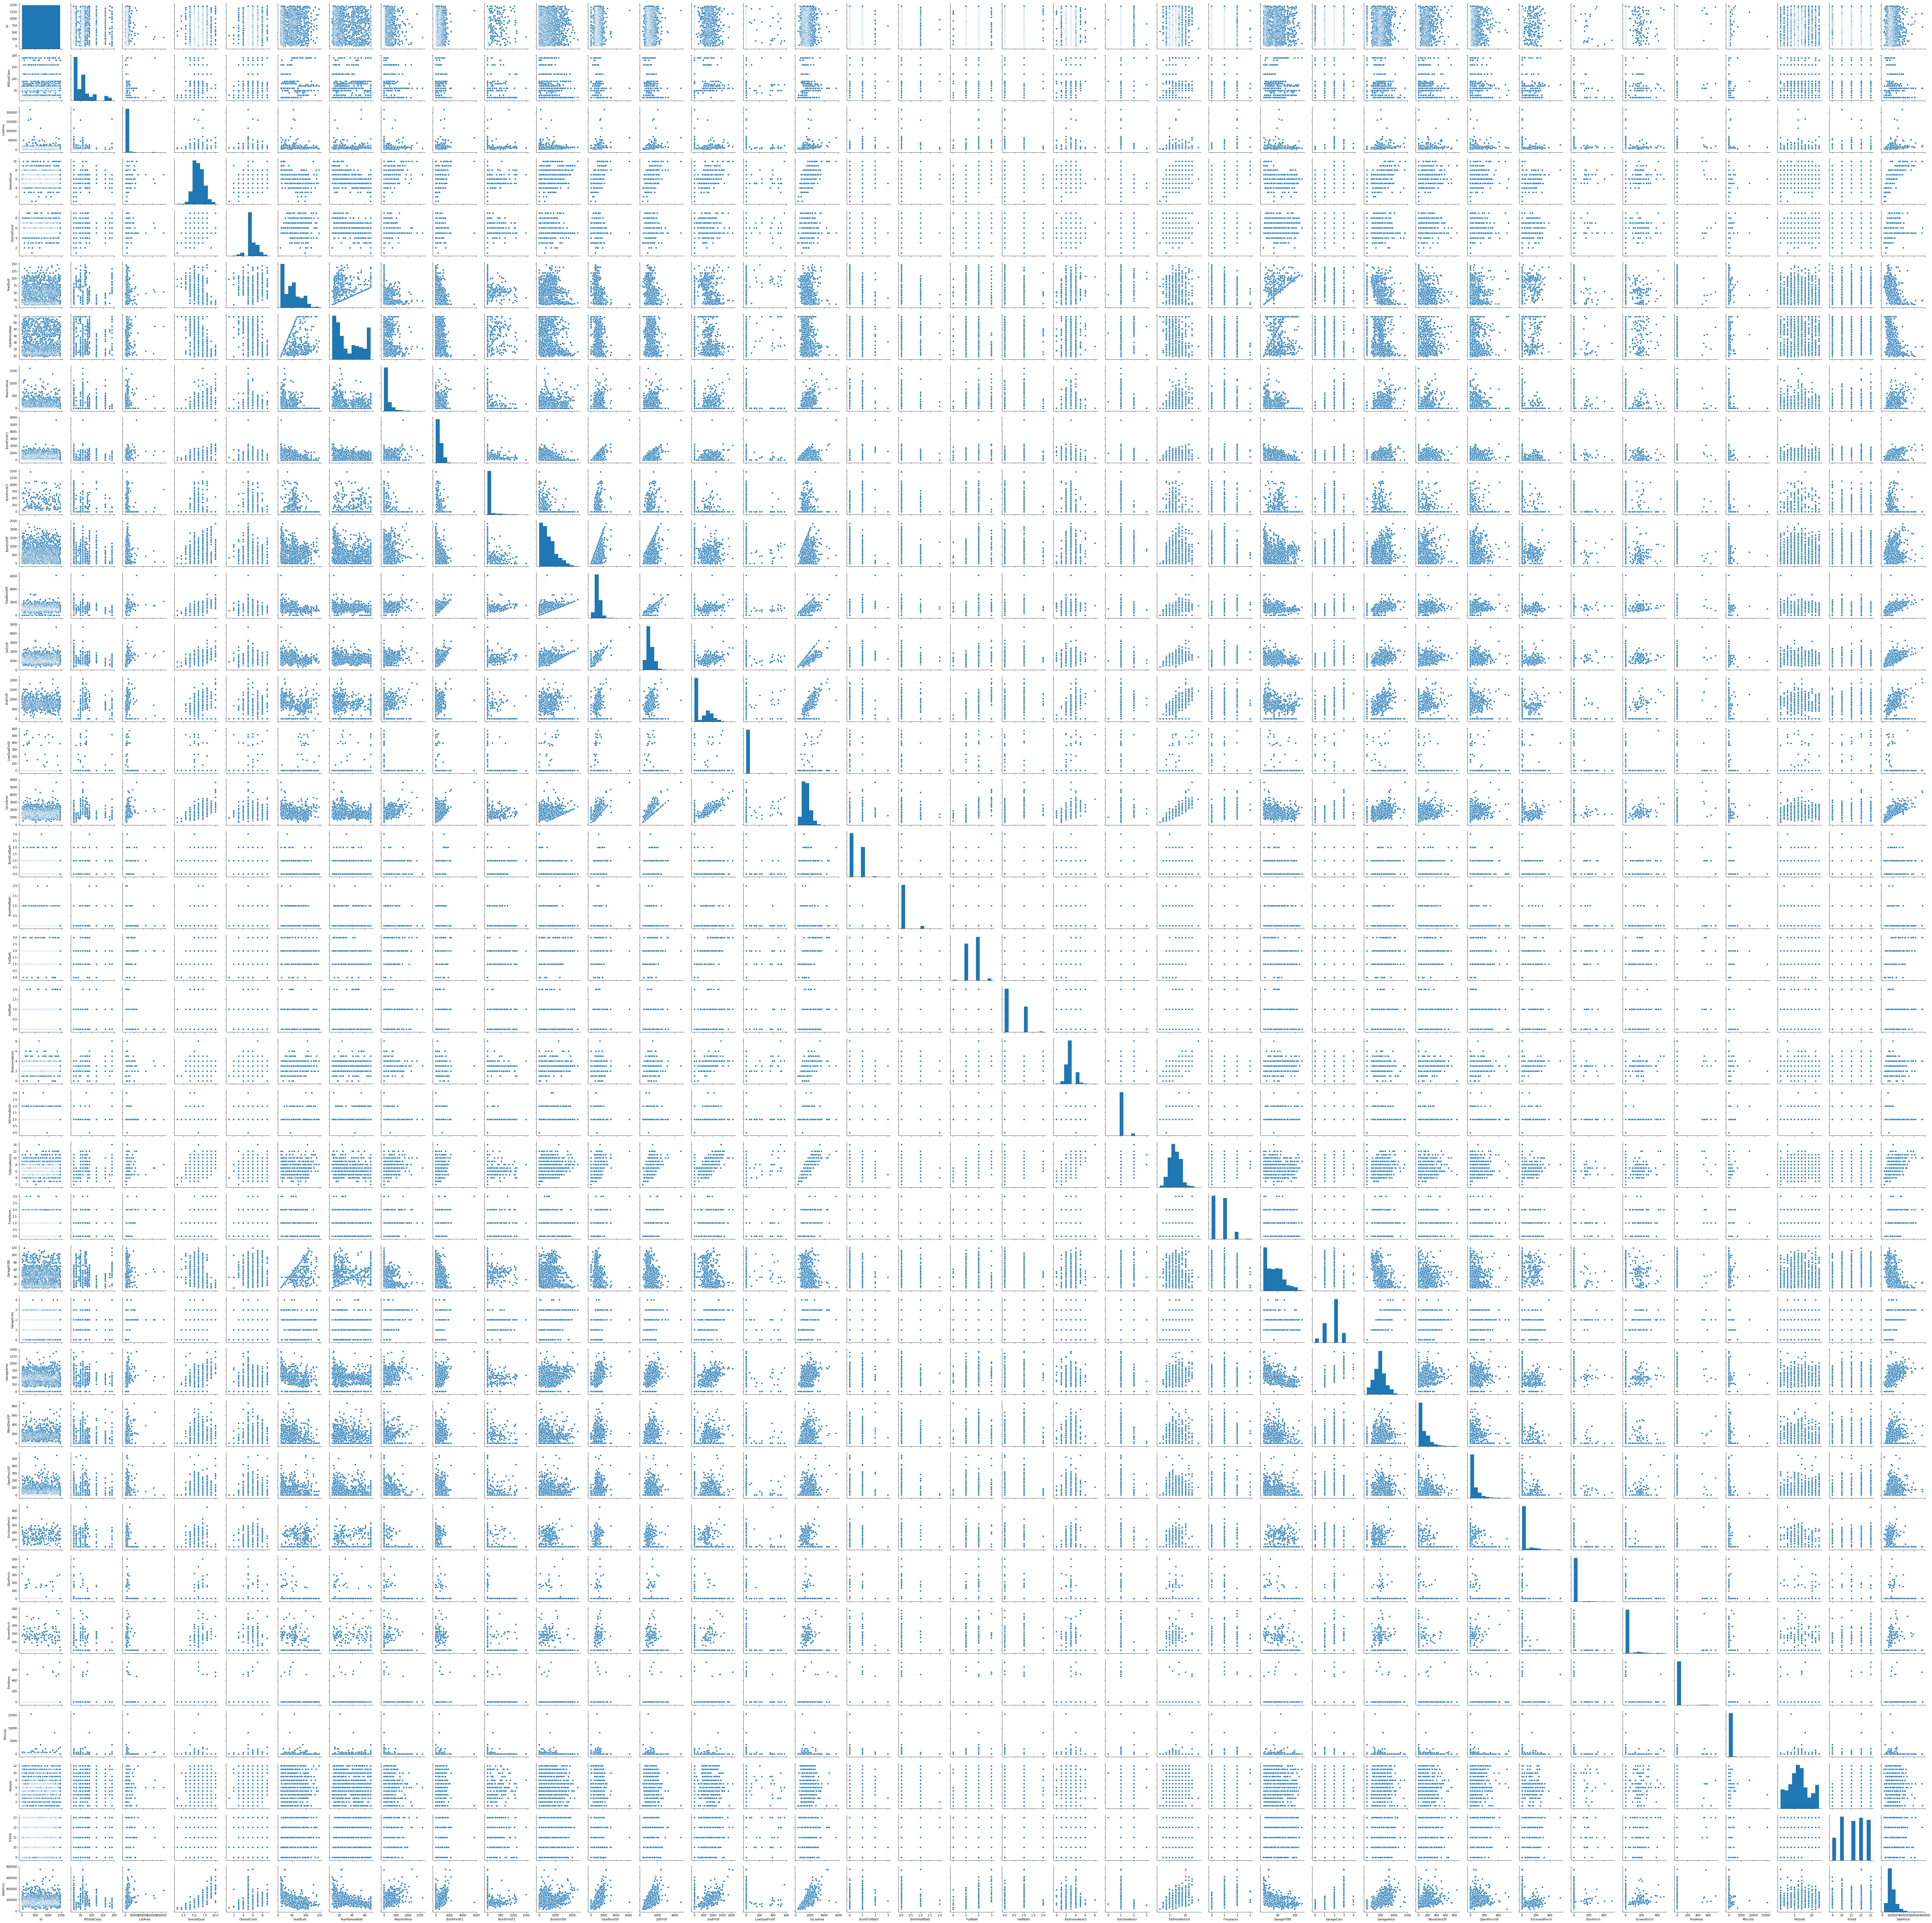

In [618]:
# paiwise scatter plot

plt.figure(figsize=(40, 20))
sns.pairplot(df_numeric)
plt.show()

#### This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [619]:
# correlation matrix
cor = df_numeric.corr()
cor

Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id             1.000000    0.011156 -0.033226    -0.028365     0.012609   
MSSubClass     0.011156    1.000000 -0.139781     0.032628    -0.059316   
LotArea       -0.033226   -0.139781  1.000000     0.105806    -0.005636   
OverallQual   -0.028365    0.032628  0.105806     1.000000    -0.091932   
OverallCond    0.012609   -0.059316 -0.005636    -0.091932     1.000000   
YearBuilt      0.012713   -0.027850 -0.014228    -0.572323     0.375983   
YearRemodAdd   0.021998   -0.040581 -0.013788    -0.550684    -0.073741   
MasVnrArea    -0.051071    0.023573  0.103321     0.407252    -0.125694   
BsmtFinSF1    -0.005024   -0.069836  0.214103     0.239666    -0.046231   
BsmtFinSF2    -0.005968   -0.065649  0.111170    -0.059119     0.040229   
BsmtUnfSF     -0.007940   -0.140759 -0.002618     0.308159    -0.136841   
TotalBsmtSF   -0.015415   -0.238518  0.260833     0.537808    -0.171098   
1stFlrSF       0.010496   -0.251758  0.299475     0.476224    -0.144203   
2ndFlrSF       0.005590    0.307886  0.050986     0.295493     0.028942   
LowQualFinSF  -0.044230    0.046474  0.004779    -0.030429     0.025494   
GrLivArea      0.008273    0.074853  0.263116     0.593007    -0.079686   
BsmtFullBath   0.002289    0.003491  0.158155     0.111098    -0.054942   
BsmtHalfBath  -0.020155   -0.002333  0.048046    -0.040150     0.117821   
FullBath       0.005587    0.131608  0.126031     0.550600    -0.194149   
HalfBath       0.006784    0.177354  0.014259     0.273458    -0.060769   
BedroomAbvGr   0.037719   -0.023438  0.119690     0.101676     0.012980   
KitchenAbvGr   0.002951    0.281721 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd   0.027239    0.040380  0.190015     0.427452    -0.057583   
Fireplaces    -0.019772   -0.045569  0.271364     0.396765    -0.023820   
GarageYrBlt    0.000122   -0.081396  0.025865    -0.514231     0.306276   
GarageCars     0.016570   -0.040110  0.154871     0.600671    -0.185758   
GarageArea     0.017634   -0.098672  0.180403     0.562022    -0.151521   
WoodDeckSF    -0.029643   -0.012579  0.171698     0.238923    -0.003334   
OpenPorchSF   -0.000477   -0.006100  0.084774     0.308819    -0.032589   
EnclosedPorch  0.002889   -0.012037 -0.018340    -0.113937     0.070356   
3SsnPorch     -0.046635   -0.043825  0.020423     0.030371     0.025504   
ScreenPorch    0.001330   -0.026030  0.043160     0.064886     0.054811   
PoolArea       0.057044    0.008283  0.077672     0.065166    -0.001985   
MiscVal       -0.006242   -0.007683  0.038068    -0.031406     0.068777   
MoSold         0.021172   -0.013585  0.001205     0.070815    -0.003511   
YrSold        -0.000712    0.021407  0.014261     0.027347    -0.043950   
SalePrice     -0.021917   -0.084284  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
Id              0.012713      0.021998   -0.051071   -0.005024   -0.005968   
MSSubClass     -0.027850     -0.040581    0.023573   -0.069836   -0.065649   
LotArea        -0.014228     -0.013788    0.103321    0.214103    0.111170   
OverallQual    -0.572323     -0.550684    0.407252    0.239666   -0.059119   
OverallCond     0.375983     -0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855   -0.311600   -0.249503    0.049107   
YearRemodAdd    0.592855      1.000000   -0.176529   -0.128451    0.067759   
MasVnrArea     -0.311600     -0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1     -0.249503     -0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2      0.049107      0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF      -0.149040     -0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF    -0.391452     -0.291066    0.360067    0.522396    0.104810   
1stFlrSF       -0.281986     -0.240379    0.339850    0.445863    0.097117   
2ndFlrSF       -0.010308     -0.140024    0.173800   -0.137079   -0.099260   


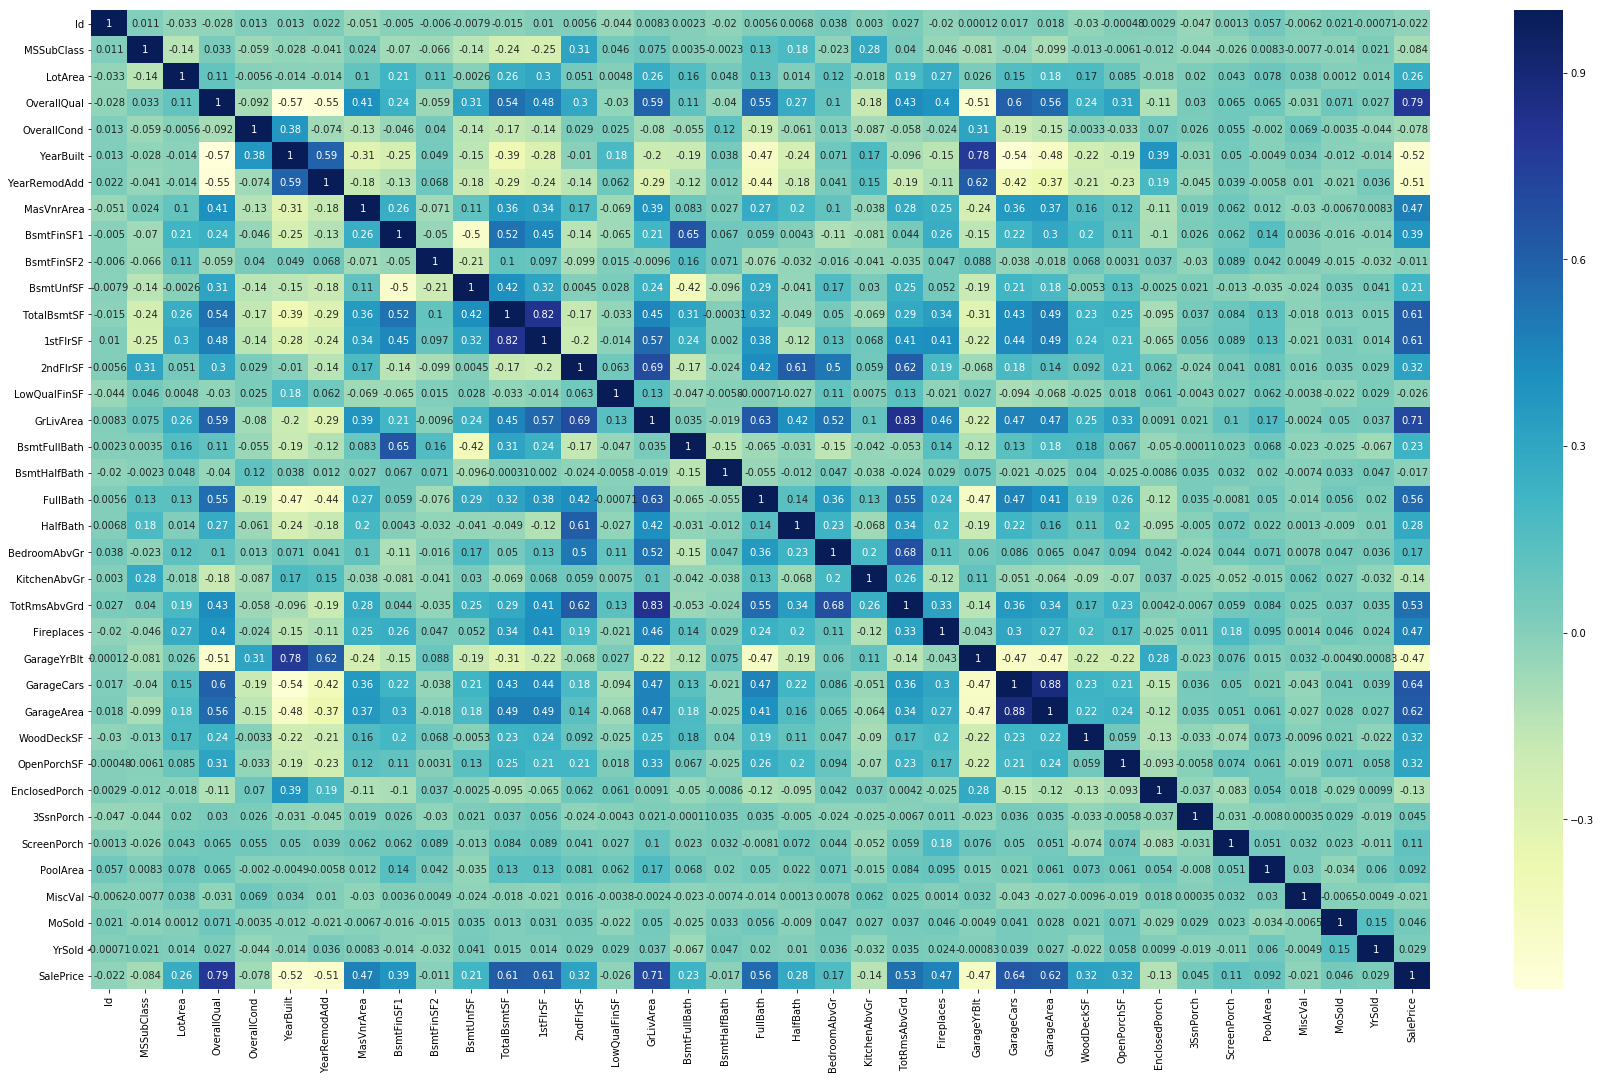

In [620]:
# Visualising numerical variables
plt.figure(figsize=(30,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### INFERENCE
    
Correlation of SalePrice with independent variables:
    
SalePrice is highly (positively) correlated with OverallQual, YearBuilt, YearRemodAdd, TotaLBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageYrBlt, GarageCars, GarageArea.

SalePrice is negatively correlated to EnclosedPorch (-0.13 approximately).

Correlation among independent variables:
    
Many independent variables are highly correlated: TotaLBsmtSF and 1stFlrSF, YearBuilt and GarageYrBlt, GrLivArea and TotRmsAbvGrd, BedroomAbvGr,2ndFlrSF etc are positively correlated 
Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

### Removing Outliers

##### Removing outliers below 5th percentile and above 95th percentile

In [621]:
def drop_outliers(x):
    list = []
    for col in df_numeric:
        Q1 = x[col].quantile(.05)
        Q3 = x[col].quantile(.95)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = drop_outliers(df)

In [622]:
# subset all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functional  \
0      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
1      Veenker      Feedr       Norm  ...      SBrkr          TA        Typ   
2      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
3      Crawfor       Norm       Norm  ...      SBrkr          Gd        Typ   
4      NoRidge       Norm       Norm  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 38 columns]

### Univariate analysis of categorical variables

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

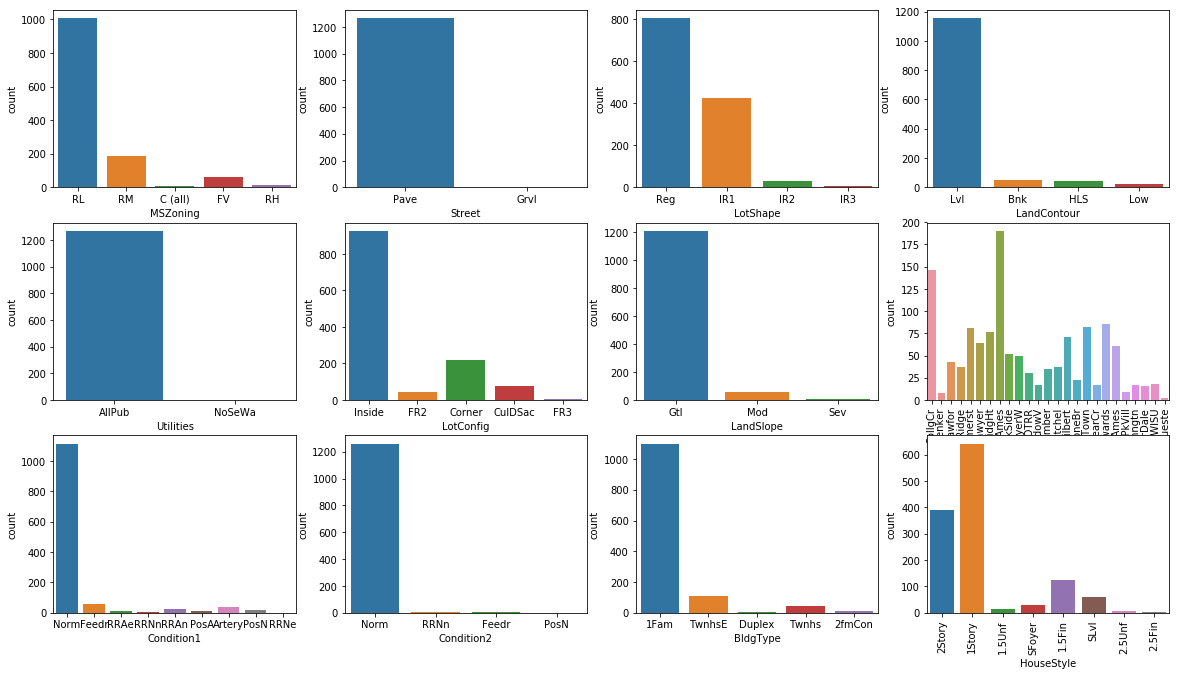

In [623]:
from matplotlib.pyplot import xticks


plt.figure(figsize=(20,15))

#Subplots for univariate analysis on different categorical variables
plt.subplot(4,4,1)
sns.countplot(df["MSZoning"])
plt.subplot(4,4,2)
sns.countplot(df["Street"])
plt.subplot(4,4,3)
sns.countplot(df["LotShape"])
plt.subplot(4,4,4)
sns.countplot(df["LandContour"])
plt.subplot(4,4,5)
sns.countplot(df["Utilities"])
plt.subplot(4,4,6)
sns.countplot(df["LotConfig"])
plt.subplot(4,4,7)
sns.countplot(df["LandSlope"])
plt.subplot(4,4,8)
sns.countplot(df["Neighborhood"])
xticks(rotation = 90)
plt.subplot(4,4,9)
sns.countplot(df["Condition1"])
plt.subplot (4,4,10)
sns.countplot(df["Condition2"])
plt.subplot(4,4,11)
sns.countplot(df["BldgType"])
plt.subplot (4,4,12)
sns.countplot(df["HouseStyle"])
xticks(rotation = 90)

#### INFERENCE:

For MSZoning, RL(Residential Low Density) has high sale

Street and Utilities have low variance and hence can be dropped

For Lotshape, Regular shape of the property is most popular among buyers

For LotConfig, Inside lot is most preferred by buyers of the property

For LandContour, near flat or level propety is preferred

For LandSlope, Gentle slope property is most preferred by people

Normal Conditions are preferred by the people

Single-family detached(1Fam) type of dwelling is preferred

1Story building are most preferred for housestyle


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

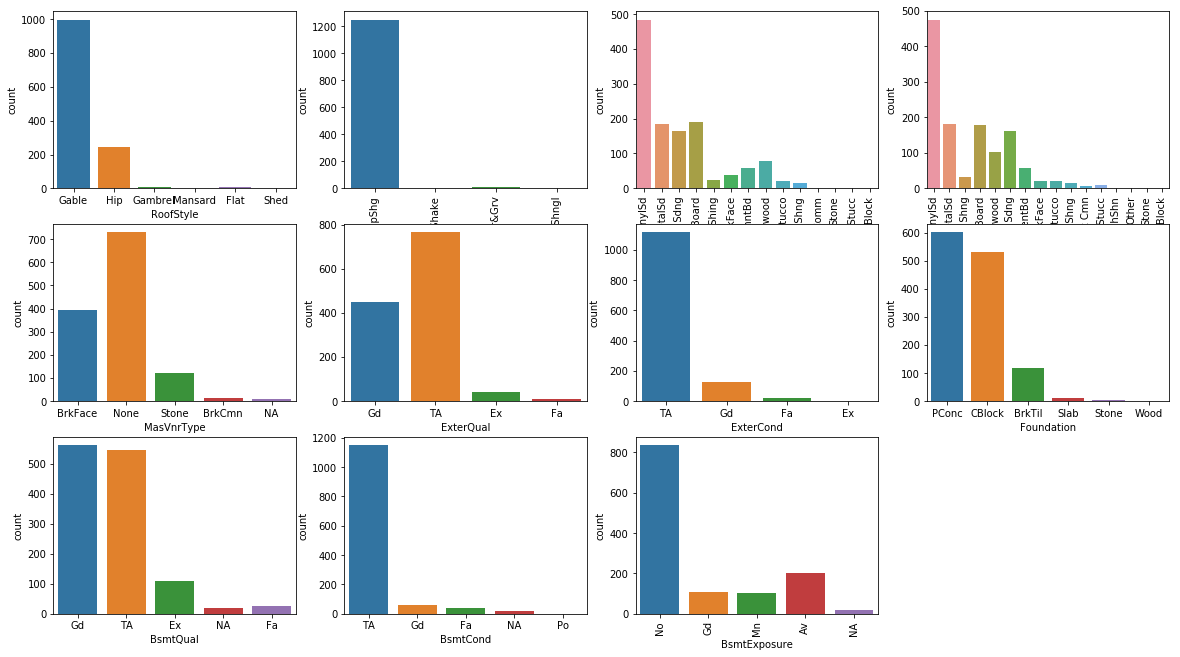

In [624]:
from matplotlib.pyplot import xticks


plt.figure(figsize=(20,15))

#Subplots for univariate analysis on different categorical variables
plt.subplot(4,4,1)
sns.countplot(df["RoofStyle"])
plt.subplot(4,4,2)
sns.countplot(df["RoofMatl"])
xticks(rotation = 90)
plt.subplot(4,4,3)
sns.countplot(df["Exterior1st"])
xticks(rotation = 90)
plt.subplot(4,4,4)
sns.countplot(df["Exterior2nd"])
xticks(rotation = 90)
plt.subplot(4,4,5)
sns.countplot(df["MasVnrType"])
plt.subplot(4,4,6)
sns.countplot(df["ExterQual"])
plt.subplot(4,4,7)
sns.countplot(df["ExterCond"])
plt.subplot(4,4,8)
sns.countplot(df["Foundation"])
plt.subplot (4,4,9)
sns.countplot(df["BsmtQual"])
plt.subplot(4,4,10)
sns.countplot(df["BsmtCond"])
plt.subplot (4,4,11)
sns.countplot(df["BsmtExposure"])
xticks(rotation = 90)

### INFERENCE:

Gable type of roof is most popular amon buyers

Type of roof material preferred by people is CompShg:Standard (Composite) Shingle
    
Exterior covering on house preferred by people is Vinyl Siding, hard board and Metal Siding

Masonry veneer type is not preferred by people

The quality of the material on the exterior is bsically average/typical

The present condition of the material on the exterior is also average/typical

Type of foundation preferred by buyers is Poured Contrete and Cinder Block

The height of basement preferred by buyers is Good (90-99 inches) and Typical (80-89 inches)
       
The general condition of the basement is Typical - slight dampness allowed

No exposure is preferred for basement by people


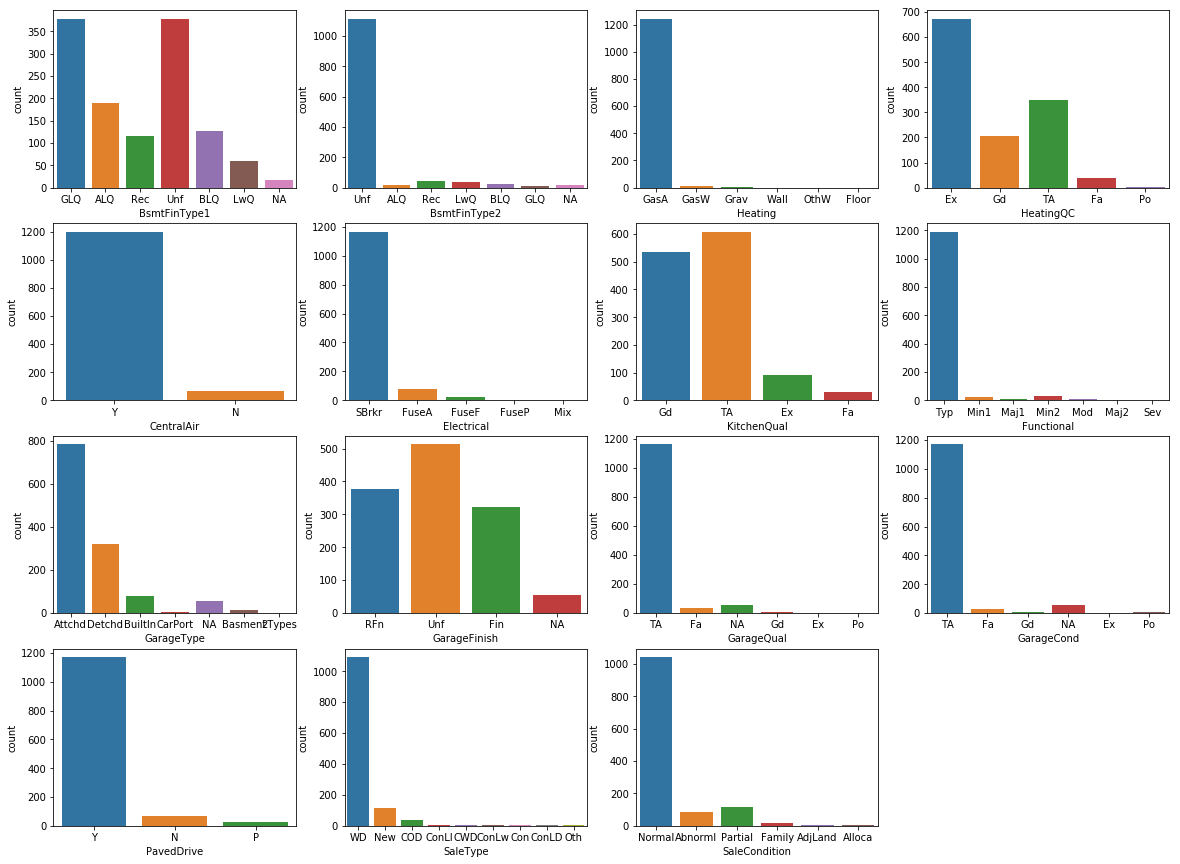

In [625]:

plt.figure(figsize=(20,15))

#Subplots for univariate analysis on different categorical variables
plt.subplot(4,4,1)
sns.countplot(df["BsmtFinType1"])
plt.subplot(4,4,2)
sns.countplot(df["BsmtFinType2"])
plt.subplot(4,4,3)
sns.countplot(df["Heating"])
plt.subplot(4,4,4)
sns.countplot(df["HeatingQC"])
plt.subplot(4,4,5)
sns.countplot(df["CentralAir"])
plt.subplot(4,4,6)
sns.countplot(df["Electrical"])
plt.subplot(4,4,7)
sns.countplot(df["KitchenQual"])
plt.subplot(4,4,8)
sns.countplot(df["Functional"])
plt.subplot(4,4,9)
sns.countplot(df["GarageType"])
plt.subplot (4,4,10)
sns.countplot(df["GarageFinish"])
plt.subplot(4,4,11)
sns.countplot(df["GarageQual"])
plt.subplot (4,4,12)
sns.countplot(df["GarageCond"])
plt.subplot (4,4,13)
sns.countplot(df["PavedDrive"])
plt.subplot(4,4,14)
sns.countplot(df["SaleType"])
plt.subplot (4,4,15)
sns.countplot(df["SaleCondition"])


### INFERENCE:

Rating of basement finished area is Good Living Quarters

Type of heating preferred is Gas forced warm air furnace

Buyers prefer Heating quality and condition of the to be excellent

Most buyers prefer Central air conditioning houses

Most preferred electrical system for houses is SBrkr(Standard Circuit Breakers & Romex)

The kitchen quality preferred is typical/average followd by good

Typical Functionality is preferred by the buyers

Most people prefer garage to be attached to home followed by away from home

People prefer unfinished interior and typical quality  and typical/average condition for garage

The driveway should be paved has high preference

Most popular type of sale is WD (Warranty Deed - Conventional) and sale condition is normal


### BiVariate Analysis for Categorical variables

#### Spread of data of the target variable "Price" with various categorical varibles¶

In [626]:
#function to visualize box plot and count plot to compare the frequency and price distribution with various categorical variables

def price_with_category_bivariate(i):
    plt.figure(figsize=(15,5))
    plt.subplots_adjust(hspace=1, wspace=0.3)
    plt.subplot(1,2,1)
    sns.boxplot(x=df[i], y=df["SalePrice"])
    plt.subplot(1,2,2)
    sns.countplot(df[i])
    

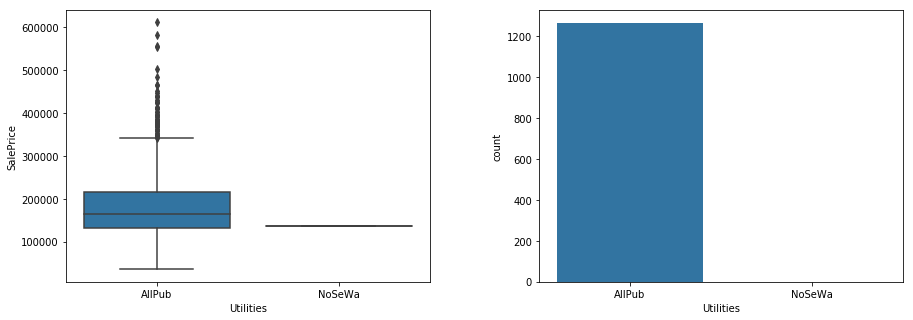

In [627]:
price_with_category_bivariate("Utilities")

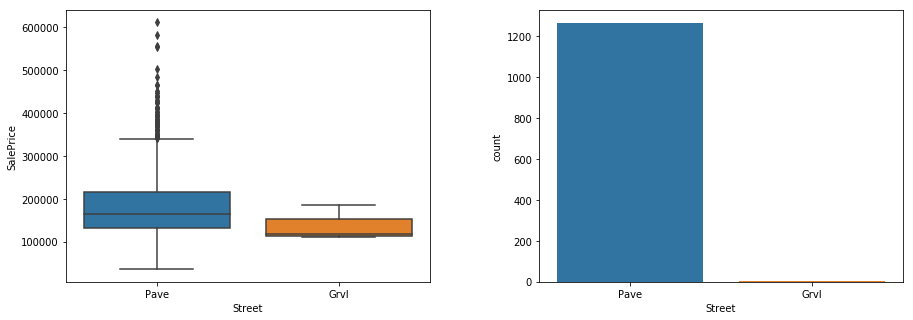

In [628]:
price_with_category_bivariate("Street")

#### INFERENCE:

As both street and utilities explain low variance , so dropping them for further analysis

In [629]:
# Dropping few variables as it adds no meaning to the analysis due to low variance

df=df.drop(['Id','Street','Utilities',],axis=1)

#### Checking the distribution of our target variable before scaling and Splitting

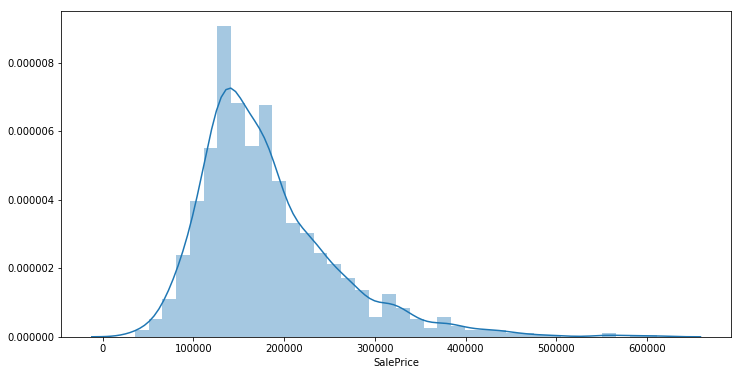

In [630]:
plt.figure(figsize=(12,6))
sns.distplot(df.SalePrice)
plt.show()

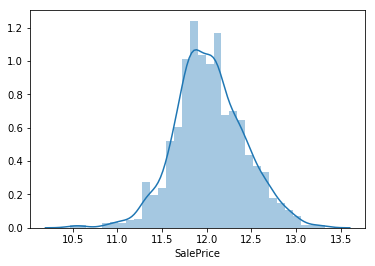

In [631]:
# Since the target variable is right skewed, we will apply log transformation

df["SalePrice"]=np.log(df["SalePrice"])
sns.distplot(df["SalePrice"])

## STEP 3: DATA PREPARATION

### DATA ENCODING

In [632]:
df.shape

(1266, 72)

In [633]:
df.head(3)

MSSubClass MSZoning  LotArea LotShape LandContour LotConfig LandSlope  \
0          60       RL     8450      Reg         Lvl    Inside       Gtl   
1          20       RL     9600      Reg         Lvl       FR2       Gtl   
2          60       RL    11250      IR1         Lvl    Inside       Gtl   

  Neighborhood Condition1 Condition2  ... EnclosedPorch 3SsnPorch  \
0      CollgCr       Norm       Norm  ...             0         0   
1      Veenker      Feedr       Norm  ...             0         0   
2      CollgCr       Norm       Norm  ...             0         0   

   ScreenPorch  PoolArea  MiscVal  MoSold YrSold SaleType SaleCondition  \
0            0         0        0       2     11       WD        Normal   
1            0         0        0       5     12       WD        Normal   
2            0         0        0       9     11       WD        Normal   

   SalePrice  
0  12.247694  
1  12.109011  
2  12.317167  

[3 rows x 72 columns]

In [634]:
# subset all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

MSZoning LotShape LandContour LotConfig LandSlope Neighborhood Condition1  \
0       RL      Reg         Lvl    Inside       Gtl      CollgCr       Norm   
1       RL      Reg         Lvl       FR2       Gtl      Veenker      Feedr   
2       RL      IR1         Lvl    Inside       Gtl      CollgCr       Norm   
3       RL      IR1         Lvl    Corner       Gtl      Crawfor       Norm   
4       RL      IR1         Lvl       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  ... Electrical KitchenQual Functional  \
0       Norm     1Fam     2Story  ...      SBrkr          Gd        Typ   
1       Norm     1Fam     1Story  ...      SBrkr          TA        Typ   
2       Norm     1Fam     2Story  ...      SBrkr          Gd        Typ   
3       Norm     1Fam     2Story  ...      SBrkr          Gd        Typ   
4       Norm     1Fam     2Story  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 36 columns]

#### For categorical variables with multiple levels, create dummy features

In [635]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(df[['MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','Electrical','KitchenQual','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']], drop_first = True)

# Add the results to the original housing dataframe
df = pd.concat([df, status], axis = 1)

# Now let's see the head of our dataframe.
df.head()

MSSubClass MSZoning  LotArea LotShape LandContour LotConfig LandSlope  \
0          60       RL     8450      Reg         Lvl    Inside       Gtl   
1          20       RL     9600      Reg         Lvl       FR2       Gtl   
2          60       RL    11250      IR1         Lvl    Inside       Gtl   
3          70       RL     9550      IR1         Lvl    Corner       Gtl   
4          60       RL    14260      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... SaleType_ConLI SaleType_ConLw  \
0      CollgCr       Norm       Norm  ...              0              0   
1      Veenker      Feedr       Norm  ...              0              0   
2      CollgCr       Norm       Norm  ...              0              0   
3      Crawfor       Norm       Norm  ...              0              0   
4      NoRidge       Norm       Norm  ...              0              0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      0   
4             0             0            1                      0   

  SaleCondition_Alloca SaleCondition_Family SaleCondition_Normal  \
0                    0                    0                    1   
1                    0                    0                    1   
2                    0                    0                    1   
3                    0                    0                    0   
4                    0                    0                    1   

  SaleCondition_Partial  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 266 columns]

In [636]:
# Drop variables as we have created the dummies for it
df.drop(['MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','Electrical','KitchenQual','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'], axis = 1, inplace = True)

df.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5         16            16   
1          20     9600            6            8         43            43   
2          60    11250            7            5         18            17   
3          70     9550            7            5        104            49   
4          60    14260            8            5         19            19   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
0       196.0         706           0        150  ...               0   
1         0.0         978           0        284  ...               0   
2       162.0         486           0        434  ...               0   
3         0.0         216           0        540  ...               0   
4       350.0         655           0        490  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 230 columns]

In [637]:
#before manipulation, we will save a copy of original data

data = df.copy()

In [638]:
# Putting feature variable to X
X = df.drop(['SalePrice'], axis=1)

X.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5         16            16   
1          20     9600            6            8         43            43   
2          60    11250            7            5         18            17   
3          70     9550            7            5        104            49   
4          60    14260            8            5         19            19   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
0       196.0         706           0        150  ...               0   
1         0.0         978           0        284  ...               0   
2       162.0         486           0        434  ...               0   
3         0.0         216           0        540  ...               0   
4       350.0         655           0        490  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 229 columns]

In [639]:
# Putting response variable to y
y = df['SalePrice']

y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

#### TEST-TRAIN SPLIT AND SCALING

In [640]:
from sklearn.preprocessing import scale

# rescale the features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=229)

In [641]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [642]:
# number of features
len(X_train.columns)

229

### RIDGE REGRESSION

In [643]:
from sklearn import metrics
# ridge regression
lm = Ridge(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9605973774479614
0.8940348365464152


#### As we can see the above alpha value is not optimal for ridge regression ,as there are sign of overfitting due to difference in the train and test score


### Hyperparameter tuning using GridSearchCV

In [644]:
from sklearn.model_selection import KFold
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

#step 2: list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#Step 3: Perform grid search
#3.1: Specify Model
ridge = Ridge()

#3.2: Call GridSearchCV()

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
#fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [645]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004988      0.000001         0.000797    3.984700e-04      0.0001   
1       0.005187      0.000747         0.000996    9.122432e-07       0.001   
2       0.004987      0.000630         0.001197    3.999473e-04        0.01   
3       0.006583      0.001017         0.001196    3.991130e-04        0.05   
4       0.007780      0.001323         0.000998    1.323169e-06         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.078277          -0.088207          -0.100867   
1   {'alpha': 0.001}          -0.078275          -0.088205          -0.100864   
2    {'alpha': 0.01}          -0.078247          -0.088189          -0.100828   
3    {'alpha': 0.05}          -0.078133          -0.088122          -0.100688   
4     {'alpha': 0.1}          -0.078007          -0.088042          -0.100541   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.085905  ...        -0.089181        0.007482               27   
1          -0.085903  ...        -0.089178        0.007482               26   
2          -0.085886  ...        -0.089156        0.007480               25   
3          -0.085810  ...        -0.089065        0.007473               24   
4          -0.085718  ...        -0.088961        0.007467               23   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.056244           -0.052853           -0.053073   
1           -0.056244           -0.052853           -0.053074   
2           -0.056244           -0.052850           -0.053077   
3           -0.056243           -0.052838           -0.053093   
4           -0.056242           -0.052824           -0.053111   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.055668           -0.054794         -0.054526         0.001359  
1           -0.055668           -0.054795         -0.054527         0.001359  
2           -0.055668           -0.054799         -0.054528         0.001359  
3           -0.055666           -0.054817         -0.054531         0.001359  
4           -0.055663           -0.054837         -0.054535         0.001359  

[5 rows x 21 columns]

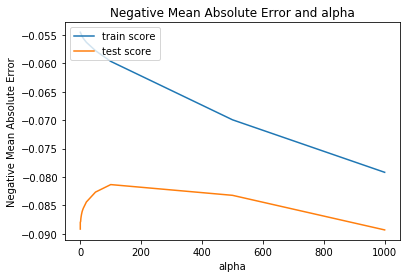

In [646]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [647]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 100}

In [648]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-3.46636657e-03,  2.84192359e-02,  5.32080024e-02,  3.32719245e-02,
       -2.79774165e-02, -2.10914590e-02,  2.69604662e-03,  2.63271753e-02,
        5.93562890e-04,  3.42544968e-03,  3.23285322e-02,  3.94336072e-02,
        2.20134493e-02,  0.00000000e+00,  4.96002302e-02,  1.11805523e-02,
       -1.09875251e-03,  1.70162538e-02,  1.25187084e-02,  7.73489925e-03,
        0.00000000e+00,  1.34391239e-02,  1.28143750e-02,  1.55237055e-03,
        1.66506145e-02,  1.88677953e-02,  7.36788985e-03,  9.67573656e-03,
        3.21790101e-03,  0.00000000e+00,  1.33192824e-02,  0.00000000e+00,
        0.00000000e+00,  2.20504099e-03,  2.69695136e-03,  5.55294470e-03,
        5.74143800e-03,  1.73807029e-02,  1.62626152e-03,  2.79177534e-03,
       -4.35801385e-04,  3.33099171e-03,  4.65685353e-03, -3.99824975e-03,
        2.93893998e-03,  1.62771622e-03, -1.19581275e-02, -1.78514535e-03,
       -6.84273093e-03, -4.01727299e-03, -6.83339100e-03, -1.18989918e-03,
       -4.53536791e-03,  

In [649]:
from sklearn import metrics
# ridge regression
lm = Ridge(alpha=100)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9530890473082488
0.9018391625898312


In [650]:
# ridge model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.032),
 ('MSSubClass', -0.003),
 ('LotArea', 0.028),
 ('OverallQual', 0.053),
 ('OverallCond', 0.033),
 ('YearBuilt', -0.028),
 ('YearRemodAdd', -0.021),
 ('MasVnrArea', 0.003),
 ('BsmtFinSF1', 0.026),
 ('BsmtFinSF2', 0.001),
 ('BsmtUnfSF', 0.003),
 ('TotalBsmtSF', 0.032),
 ('1stFlrSF', 0.039),
 ('2ndFlrSF', 0.022),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.05),
 ('BsmtFullBath', 0.011),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.017),
 ('HalfBath', 0.013),
 ('BedroomAbvGr', 0.008),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.013),
 ('Fireplaces', 0.013),
 ('GarageYrBlt', 0.002),
 ('GarageCars', 0.017),
 ('GarageArea', 0.019),
 ('WoodDeckSF', 0.007),
 ('OpenPorchSF', 0.01),
 ('EnclosedPorch', 0.003),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.013),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.002),
 ('YrSold', 0.003),
 ('MSZoning_FV', 0.006),
 ('MSZoning_RH', 0.006),
 ('MSZoning_RL', 0.017),
 ('MSZoning_RM', 0.002),
 ('LotShape_IR2', 0.003),
 ('LotShape_IR3', -0.0),

In [651]:
lm_coef = pd.DataFrame(list(zip(cols,model_parameters)))
lm_coef.columns = ['Feature','Coef']
lm_coef.sort_values(by='Coef',ascending=False).head(10)

Feature    Coef
0               constant  12.032
3            OverallQual   0.053
15             GrLivArea   0.050
12              1stFlrSF   0.039
4            OverallCond   0.033
11           TotalBsmtSF   0.032
2                LotArea   0.028
8             BsmtFinSF1   0.026
13              2ndFlrSF   0.022
73  Neighborhood_StoneBr   0.020

### LASSO REGRESSION

In [652]:
from sklearn import metrics
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9545271580441059
0.9007720128525728


### Using GridSearchCV for hyperparameter tuning

In [653]:
from sklearn.model_selection import KFold
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

#step 2: list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#Step 3: Perform grid search
#3.1: Specify Model
lasso = Lasso()

#3.2: Call GridSearchCV()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
#fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [654]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.098536      0.016681         0.001197    3.989225e-04      0.0001   
1       0.021941      0.005085         0.000998    5.761645e-07       0.001   
2       0.007180      0.001465         0.000997    3.568323e-07        0.01   
3       0.007579      0.001849         0.000997    6.641573e-07        0.05   
4       0.007181      0.002221         0.001197    3.989220e-04         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.076505          -0.085537          -0.097854   
1   {'alpha': 0.001}          -0.072958          -0.082675          -0.090332   
2    {'alpha': 0.01}          -0.071228          -0.082684          -0.085011   
3    {'alpha': 0.05}          -0.094312          -0.106053          -0.116927   
4     {'alpha': 0.1}          -0.128382          -0.140194          -0.156979   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.084543  ...        -0.086805        0.006975                3   
1          -0.079218  ...        -0.081859        0.005731                2   
2          -0.075593  ...        -0.080446        0.006135                1   
3          -0.096468  ...        -0.106942        0.010660                4   
4          -0.127174  ...        -0.141299        0.012415                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.056572           -0.052933           -0.053610   
1           -0.059697           -0.057092           -0.056776   
2           -0.076442           -0.074436           -0.075161   
3           -0.107875           -0.104312           -0.105042   
4           -0.142156           -0.138613           -0.140746   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.055878           -0.055469         -0.054893         0.001386  
1           -0.059597           -0.059842         -0.058601         0.001367  
2           -0.076166           -0.075063         -0.075454         0.000743  
3           -0.106627           -0.105443         -0.105860         0.001256  
4           -0.141283           -0.139100         -0.140380         0.001331  

[5 rows x 21 columns]

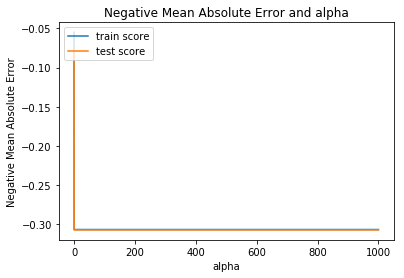

In [655]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [656]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.01}

In [657]:
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [658]:
lasso.coef_

array([-0.        ,  0.02869971,  0.10098747,  0.03058573, -0.04926926,
       -0.02367447,  0.        ,  0.03190274,  0.        , -0.        ,
        0.04207052,  0.0004677 ,  0.        ,  0.        ,  0.12028462,
        0.0048203 ,  0.        ,  0.00295408,  0.        ,  0.        ,
        0.        ,  0.00037084,  0.0110907 , -0.        ,  0.02172035,
        0.01918035,  0.        ,  0.00165216,  0.        ,  0.        ,
        0.00468052,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.01768558,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.01244241, -0.        ,  0.        , -0.        ,
       -0.0002908 , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.00621161, -0.        ,  0.        ,  0.  

In [660]:
from sklearn import metrics
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.927682657566621
0.8966438693781362


In [661]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.033),
 ('MSSubClass', -0.0),
 ('LotArea', 0.029),
 ('OverallQual', 0.101),
 ('OverallCond', 0.031),
 ('YearBuilt', -0.049),
 ('YearRemodAdd', -0.024),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.032),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.042),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.12),
 ('BsmtFullBath', 0.005),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.003),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.011),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 0.022),
 ('GarageArea', 0.019),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.002),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.005),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.0),
 ('YrSold', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.018),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandC

In [662]:
lm_coef = pd.DataFrame(list(zip(cols,model_parameters)))
lm_coef.columns = ['Feature','Coef']
lm_coef.sort_values(by='Coef',ascending=False).head(10)

Feature    Coef
0                 constant  12.033
15               GrLivArea   0.120
3              OverallQual   0.101
11             TotalBsmtSF   0.042
8               BsmtFinSF1   0.032
4              OverallCond   0.031
2                  LotArea   0.029
25              GarageCars   0.022
26              GarageArea   0.019
229  SaleCondition_Partial   0.015

# CONCLUSION:

After creating model in both Ridge and Lasso we can see that the r2_scores of train and test data are almost same for Lasso and it will also help in feature elimination so i will use LASSO REGRESSION as my final model.

### Final Model



In [663]:
from sklearn import metrics
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.927682657566621
0.8966438693781362


### Variables which are significant in predicting the price of a house are as follows:

1)GrLivArea: Above grade (ground) living area square feet)

2)OverallQual: Rates the overall material and finish of the house

3)TotalBsmtSF: Total square feet of basement area

4)BsmtFinSF1: Type 1 finished square feet

5)OverallCond: Rates the overall condition of the house

6)LotArea: Lot size in square feet

### Optimal value of alpha for ridge and lasso regression

Best alpha value for Lasso : {'alpha': 0.01}

Best alpha value for Ridge : {'alpha': 100}


#### Subjective question

Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [664]:
data.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5         16            16   
1          20     9600            6            8         43            43   
2          60    11250            7            5         18            17   
3          70     9550            7            5        104            49   
4          60    14260            8            5         19            19   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
0       196.0         706           0        150  ...               0   
1         0.0         978           0        284  ...               0   
2       162.0         486           0        434  ...               0   
3         0.0         216           0        540  ...               0   
4       350.0         655           0        490  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 230 columns]

In [665]:
# Putting feature variable to X
#dropping predictor variables (GrLivArea,OverallQual,TotalBsmtSF,BsmtFinSF1,OverallCond)
X = data.drop(['SalePrice','GrLivArea','OverallQual','TotalBsmtSF','BsmtFinSF1','OverallCond'], axis=1)

X.head()

MSSubClass  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF2  \
0          60     8450         16            16       196.0           0   
1          20     9600         43            43         0.0           0   
2          60    11250         18            17       162.0           0   
3          70     9550        104            49         0.0           0   
4          60    14260         19            19       350.0           0   

   BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLI  \
0        150       856       854             0  ...               0   
1        284      1262         0             0  ...               0   
2        434       920       866             0  ...               0   
3        540       961       756             0  ...               0   
4        490      1145      1053             0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 224 columns]

In [666]:
# Putting response variable to y
y = data['SalePrice']

y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [667]:
from sklearn.preprocessing import scale

# rescale the features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=224)

In [668]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [669]:
# number of features
len(X_train.columns)

224

### LASSO REGRESSION

In [670]:
from sklearn import metrics
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9449692021869216
0.8772378794094833


In [671]:
from sklearn.model_selection import KFold
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

#step 2: list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#Step 3: Perform grid search
#3.1: Specify Model
lasso = Lasso()

#3.2: Call GridSearchCV()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
#fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [672]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.096940  1.826440e-02         0.000998    6.143617e-07      0.0001   
1       0.023935  5.606119e-03         0.001197    3.991366e-04       0.001   
2       0.006582  7.979993e-04         0.000997    6.306757e-04        0.01   
3       0.006383  7.975461e-04         0.001597    1.200390e-03        0.05   
4       0.005983  8.064048e-07         0.000997    5.917394e-07         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.080589          -0.093509          -0.107978   
1   {'alpha': 0.001}          -0.078244          -0.090444          -0.100908   
2    {'alpha': 0.01}          -0.083722          -0.095072          -0.100728   
3    {'alpha': 0.05}          -0.116850          -0.126125          -0.145328   
4     {'alpha': 0.1}          -0.153300          -0.162736          -0.179649   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.092456  ...        -0.093299        0.008716                3   
1          -0.086123  ...        -0.088057        0.007522                1   
2          -0.092301  ...        -0.092822        0.005499                2   
3          -0.125450  ...        -0.128677        0.009331                4   
4          -0.151039  ...        -0.161634        0.010073                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.061889           -0.058690           -0.057459   
1           -0.065424           -0.062507           -0.060557   
2           -0.086348           -0.082781           -0.082483   
3           -0.129035           -0.124555           -0.124266   
4           -0.161324           -0.158758           -0.158360   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.060943           -0.060838         -0.059964         0.001632  
1           -0.064351           -0.064820         -0.063532         0.001778  
2           -0.084972           -0.084276         -0.084172         0.001426  
3           -0.125821           -0.127491         -0.126233         0.001805  
4           -0.159308           -0.158302         -0.159210         0.001116  

[5 rows x 21 columns]

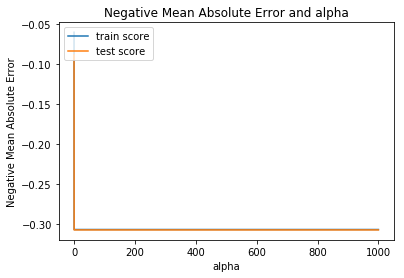

In [673]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [674]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [675]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [676]:
lasso.coef_

array([-0.00000000e+00,  2.60815724e-02, -4.81400559e-02, -3.48262911e-02,
        1.61052125e-03, -0.00000000e+00, -9.14735722e-03,  1.41609756e-01,
        1.00207233e-01,  0.00000000e+00,  1.38697132e-02,  0.00000000e+00,
        1.21467233e-02,  4.36238556e-03,  4.89012052e-03,  0.00000000e+00,
        3.05339883e-03,  1.16387662e-02,  1.28492590e-02,  1.85319755e-02,
        1.99494656e-02,  8.38220980e-03,  1.08578538e-02,  4.31458324e-04,
        0.00000000e+00,  1.67982458e-02,  0.00000000e+00,  0.00000000e+00,
        1.69637120e-03, -0.00000000e+00,  1.34163451e-02,  1.00556703e-02,
        4.01670417e-02,  2.20117736e-02,  4.53754315e-04, -0.00000000e+00,
        3.85782843e-03,  1.24111636e-03, -6.76376818e-03,  1.06214306e-06,
        0.00000000e+00, -1.26638158e-02, -0.00000000e+00, -1.09363645e-02,
       -6.28709531e-03, -6.87864605e-03,  0.00000000e+00, -0.00000000e+00,
        1.47113264e-03,  1.30540784e-03, -0.00000000e+00,  2.63803326e-02,
       -1.85526912e-02, -

In [677]:
from sklearn import metrics
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9449692021869216
0.8772378794094833


In [678]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.031),
 ('MSSubClass', -0.0),
 ('LotArea', 0.026),
 ('YearBuilt', -0.048),
 ('YearRemodAdd', -0.035),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', -0.009),
 ('1stFlrSF', 0.142),
 ('2ndFlrSF', 0.1),
 ('LowQualFinSF', 0.0),
 ('BsmtFullBath', 0.014),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.012),
 ('HalfBath', 0.004),
 ('BedroomAbvGr', 0.005),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.003),
 ('Fireplaces', 0.012),
 ('GarageYrBlt', 0.013),
 ('GarageCars', 0.019),
 ('GarageArea', 0.02),
 ('WoodDeckSF', 0.008),
 ('OpenPorchSF', 0.011),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.017),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.002),
 ('YrSold', -0.0),
 ('MSZoning_FV', 0.013),
 ('MSZoning_RH', 0.01),
 ('MSZoning_RL', 0.04),
 ('MSZoning_RM', 0.022),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', 0.004),
 ('LandContour_HLS', 0.001),
 ('LandContour_Low', -0.007),
 ('LandContour_Lvl', 0.0),
 ('LotConfig_CulDSac',

In [679]:
lm_coef = pd.DataFrame(list(zip(cols,model_parameters)))
lm_coef.columns = ['Feature','Coef']
lm_coef.sort_values(by='Coef',ascending=False).head(10)

Feature    Coef
0                 constant  12.031
8                 1stFlrSF   0.142
9                 2ndFlrSF   0.100
33             MSZoning_RL   0.040
224  SaleCondition_Partial   0.031
68    Neighborhood_StoneBr   0.027
184           CentralAir_Y   0.027
52    Neighborhood_Crawfor   0.026
2                  LotArea   0.026
62    Neighborhood_NridgHt   0.025

#### PREDICTOR VARIABLES AFTER REMOVING THE PREVIOUS PREDICTOR VARIABLES

1)1stFlrSF: First Floor square feet

2)2ndFlrSF: Second floor square feet

3)MSZoning_RL: Identifies the general zoning classification of the sale(Residential Low Density)

4)Neighborhood_StoneBr: Physical locations within Ames city limits(Stone Brook)

5)SaleCondition_Partial:Condition of sale(Home was not completed when last assessed (associated with New Homes))